In [2]:
from qiskit import *

In [85]:
l1=input("enter a number in binary with length less than 8: ")
l2=input("enter another number in binary with length less than 8: ")
if len(l1)>len(l2):
    n=len(l1)
else:
    n=len(l2)


a=QuantumRegister(n)
b=QuantumRegister(n+1)
c=QuantumRegister(n)
cl=ClassicalRegister(n+1)


enter a number in binary with length less than 8: 1101
enter another number in binary with length less than 8: 0001


In [96]:
circuit = QuantumCircuit(a,b,c,cl)

In [97]:
circuit.draw()

In [98]:
for i in range(len(l1)):
    if l1[i]=='1':
        circuit.x(a[len(l1)-(i+1)])
for i in range(len(l2)):
    if l2[i]=='1':
        circuit.x(b[len(l2)-(i+1)])


In [99]:
circuit.draw()

In [100]:

for i in range(n-1):
    circuit.ccx(a[i],b[i],c[i+1])
    circuit.cx(a[i],b[i])
    circuit.ccx(c[i],b[i],c[i+1])
circuit.ccx(a[n-1], b[n-1], b[n])
circuit.cx(a[n-1], b[n-1])
circuit.ccx(c[n-1], b[n-1], b[n])


In [101]:
circuit.draw()

In [102]:
for i in range(n-1):
    circuit.ccx(c[(n-2)-i], b[(n-2)-i], c[(n-1)-i])
    circuit.cx(a[(n-2)-i], b[(n-2)-i])
    circuit.ccx(a[(n-2)-i], b[(n-2)-i], c[(n-1)-i])
    circuit.cx(c[(n-2)-i], b[(n-2)-i])
    circuit.cx(a[(n-2)-i], b[(n-2)-i])


In [103]:
for i in range(n+1):
    circuit.measure(b[i],cl[i])

In [104]:
circuit.draw()

In [69]:
simulator = Aer.get_backend('qasm_simulator')

In [106]:
result = execute(circuit, backend=simulator).result()
count = result.get_counts()


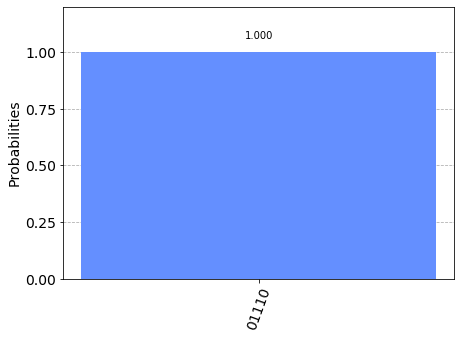

In [107]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(count)